## **Task 7: Матрица рассеяния (scatter matrix)**
Помните, как мы пытались выяснить, есть ли корреляция между количеством посещений ленты новостей и средним значением дельты (разницы между датой первого коммита и сроком сдачи лабораторного задания)? Проблема в том, что коэффициент корреляции показывает наличие линейной взаимосвязи между двумя переменными. Но что, если она не линейная? Как мы можем об этом узнать? Правильно — с помощью графиков!

Выполните необходимые шаги по созданию следующего графика:

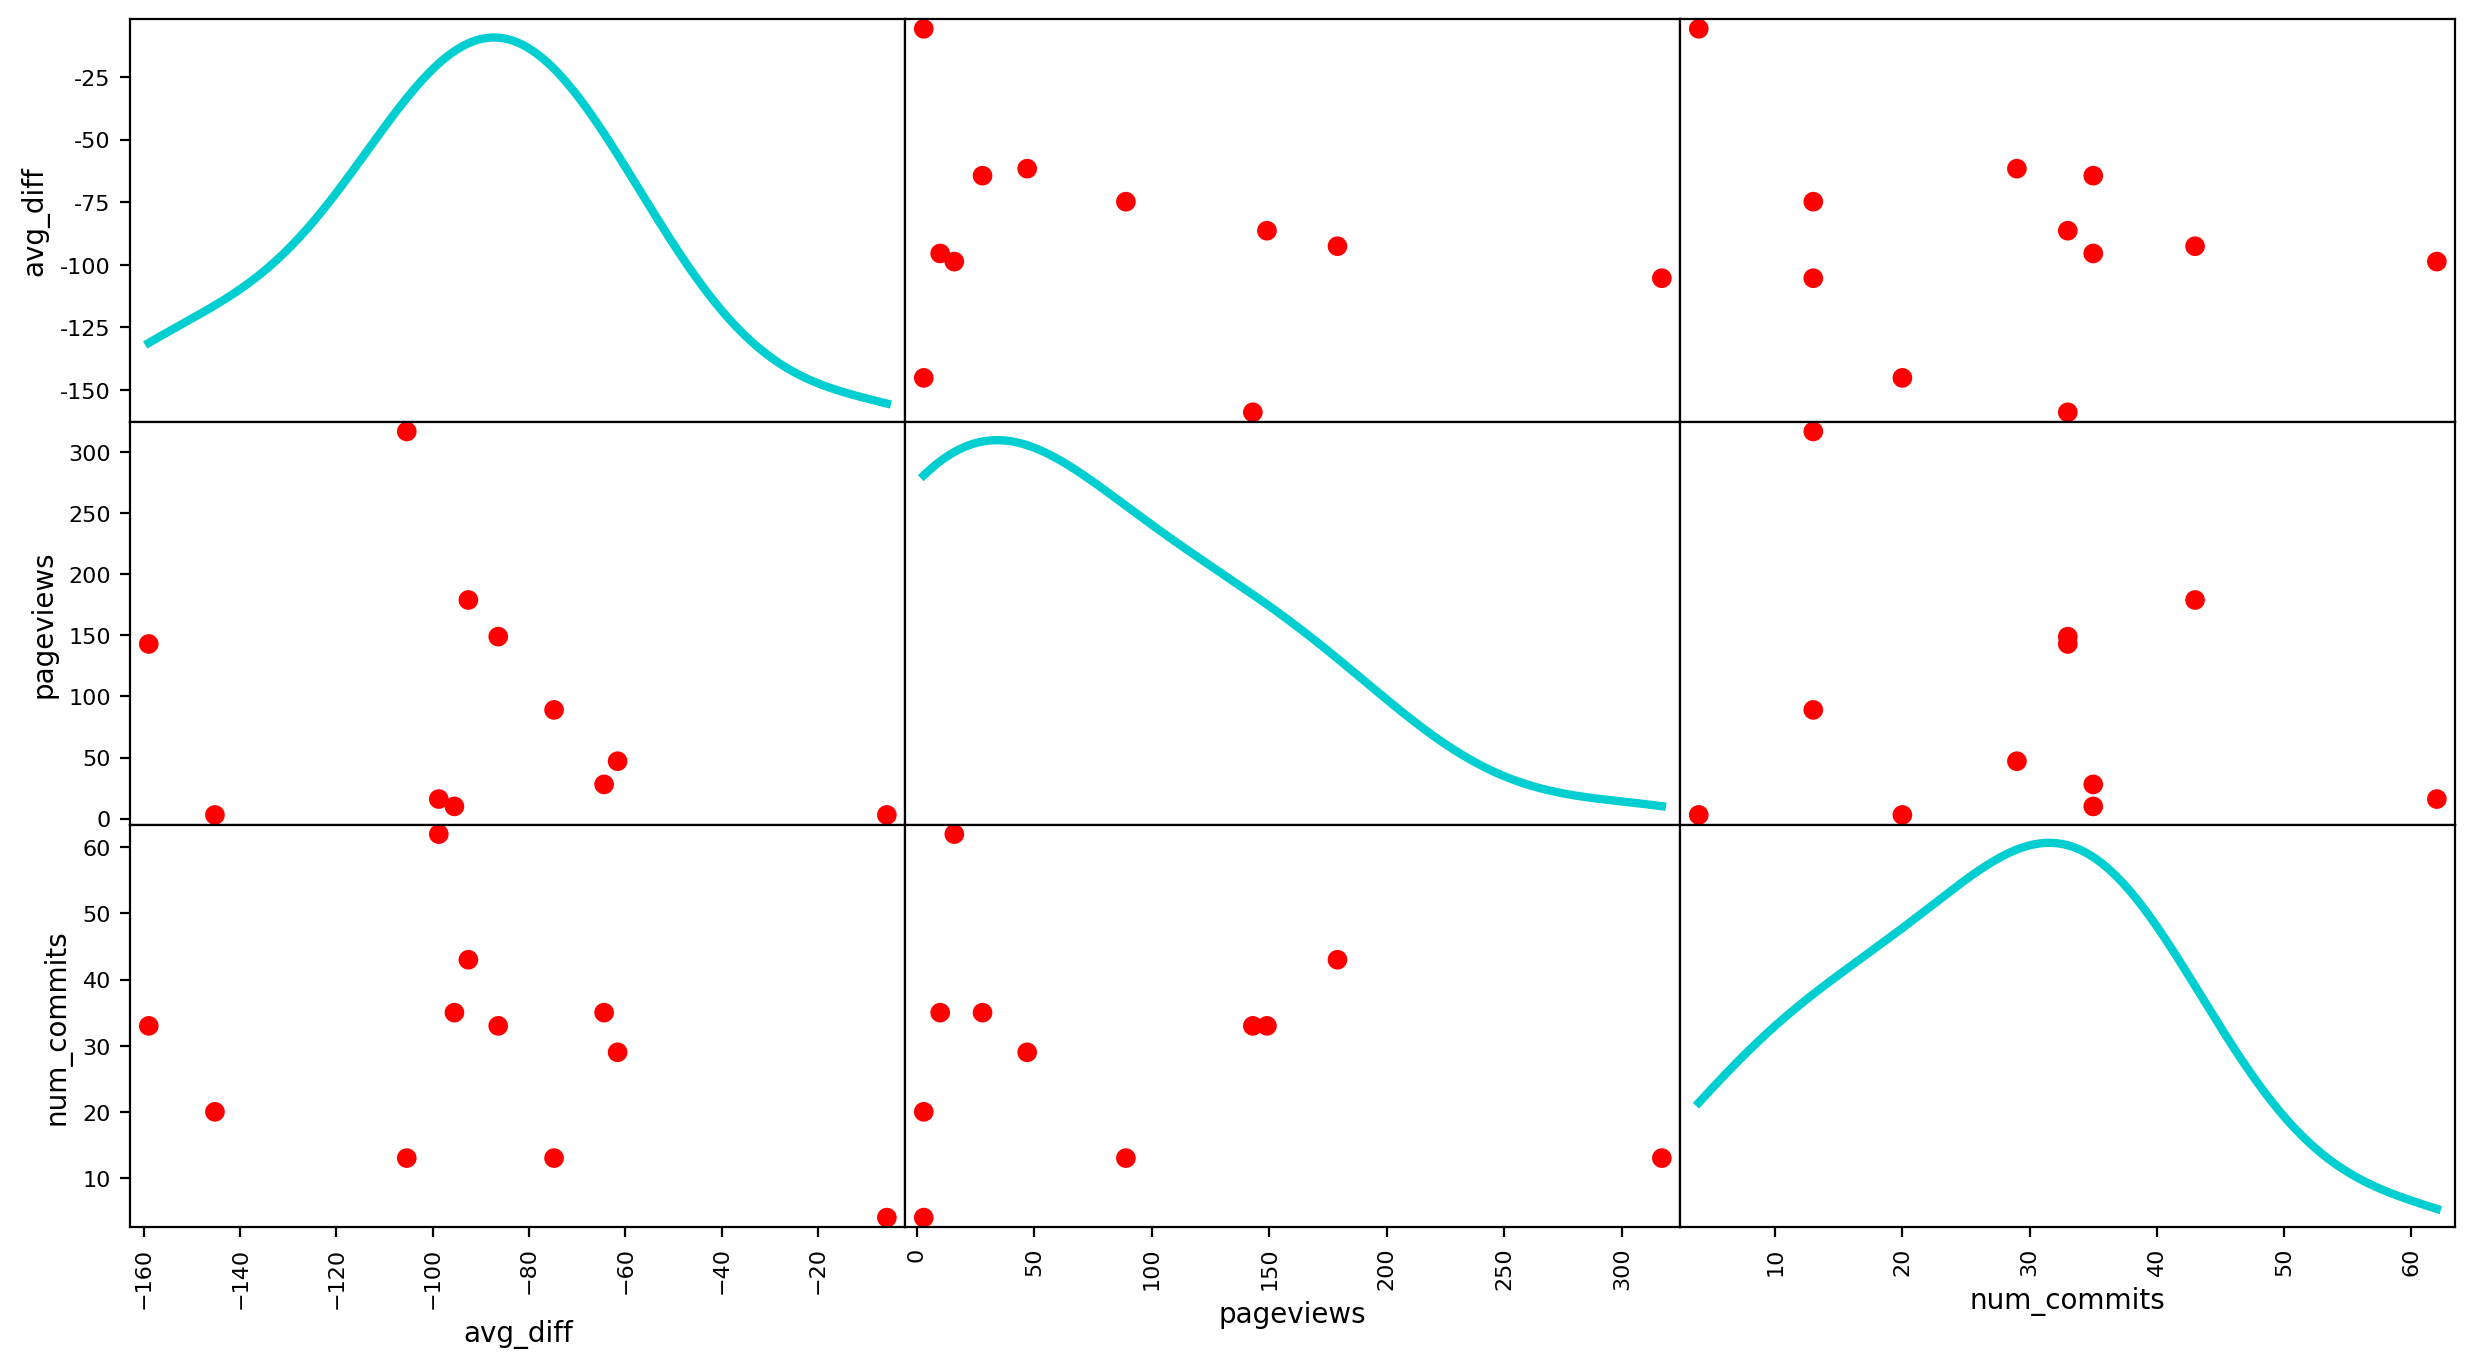

1. Создайте датафрейм, в котором для каждого пользователя тестовой группы имеется среднее значение дельты, количество просмотров страниц и количество коммитов.
2. Не учитывайте лабораторное задание `project1` при расчете среднего значения дельты и количества коммитов.
3. Возьмите количество коммитов из таблицы `checker`.
4. Используйте фильтр `status = 'ready'` для коммитов.
5. Размер `figsize` остается прежним; размер шрифта и цветовую палитру можно выбрать по своему усмотрению.
6. Размер точек — 200.
7. Ширина линий на графиках, расположенных по главной диагонали (`kde`) — 3.
8. В конце Jupyter Notebook создайте markdown-ячейку и вставьте в нее следующие вопросы.
    - «Верно ли, что если у пользователя меньше просмотров страницы, то он, скорее всего, имеет меньшее число коммитов?». Ответ: да или нет.
    - «Верно ли, что если у пользователя меньше просмотров страницы, то, скорее всего, у него будет небольшое среднее значение дельты (разница между датой первого коммита и сроком сдачи лабораторного задания)?». Ответ: да или нет.
    - «Верно ли, что существует много пользователей с небольшим количеством коммитов и мало пользователей с большим количеством коммитов?». Ответ: да или нет.
    - «Верно ли, что существует много пользователей с небольшим средним значением дельты и мало пользователей с большим средним значением дельты?». Ответ: да или нет.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlite3 import connect

In [16]:
from google.colab import drive
drive.mount('/content/drive')

In [17]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [26]:
#path = 'C:/Users/ipinguin/Documents/Edu/School21/ds-11/'
#file = 'data/checking-logs.sqlite'

#con = connect(path+file)

In [19]:
sql = '''
SELECT
    t1.uid,
    delta as avg_diff,
    viewscount AS pageviews,
    num_counts
FROM
    ( SELECT  uid,
              COUNT() as num_counts
      FROM checker
      WHERE  status='ready'
        and labname != 'project1'
        and checker.uid LIKE 'user_%'
      GROUP BY uid
    ) AS t1
JOIN
      ( SELECT  uid,
              COUNT() AS viewscount
      FROM pageviews
      GROUP BY uid
    ) AS t2
    ON t1.uid = t2.uid
JOIN
    (SELECT  uid,
        AVG((strftime('%s', first_commit) - deadlines)/3600) AS delta
    FROM
    ( 
      Select  checker.timestamp AS first_commit,
              checker.uid,
              checker.labname,
              deadlines
      From  checker
      join pageviews
        on    pageviews.uid = checker.uid
          and status='ready'
          and numTrials = 1
          and labname != 'project1'
          and checker.uid LIKE 'user_%'
      join deadlines
        on labname = labs
    ) as t3
      group by uid
        ) AS t4
    ON t1.uid = t4.uid
'''

In [20]:
df = pd.read_sql(sql, con)

In [21]:
df

,uid,avg_diff,pageviews,num_counts
0,user_1,-64.400000,28,35
1,user_10,-74.800000,89,13
2,user_14,-159.000000,143,33
3,user_17,-61.600000,47,29
4,user_18,-5.666667,3,4
5,user_19,-98.750000,16,62
6,user_21,-95.500000,10,35
7,user_25,-92.600000,179,43
8,user_28,-86.400000,149,33
9,user_3,-105.400000,317,13


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         11 non-null     object 
 1   avg_diff    11 non-null     float64
 2   pageviews   11 non-null     int64  
 3   num_counts  11 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes


_Количество коммитов_

### 5. Размер figsize остается прежним; размер шрифта и цветовую палитру можно выбрать по своему усмотрению.
### 6. Размер точек — 200.
### 7. Ширина линий на графиках, расположенных по главной диагонали (kde) — 3.

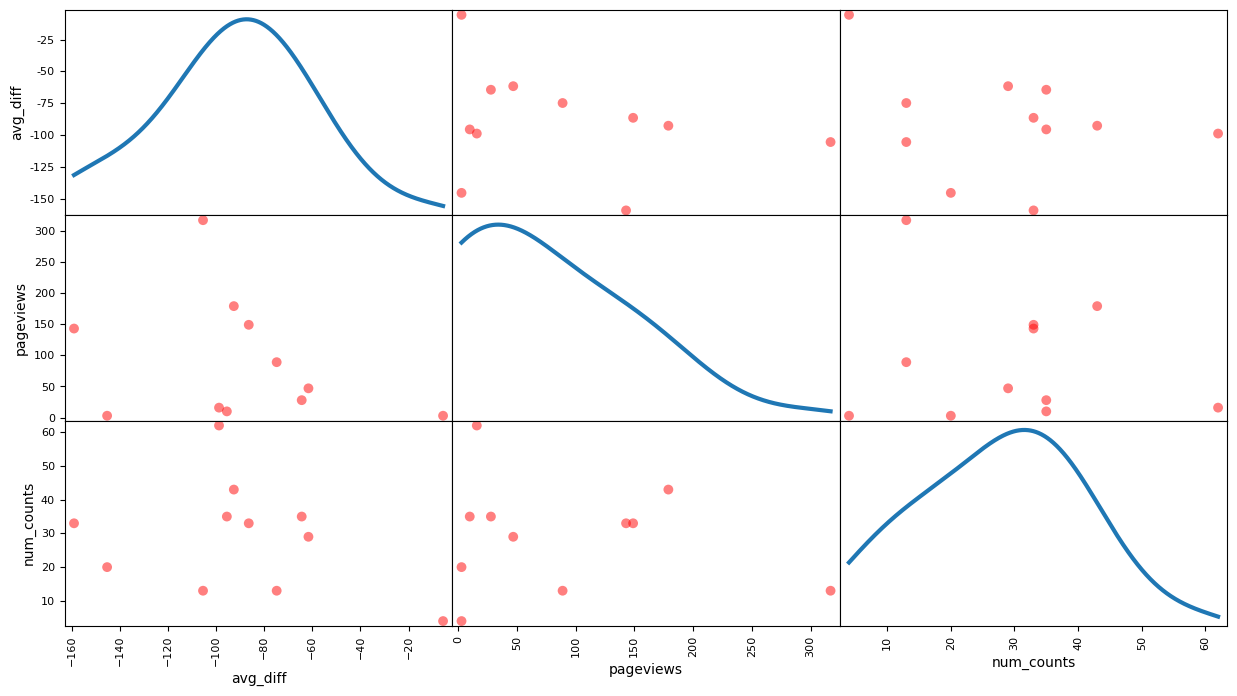

In [23]:
pd.plotting.scatter_matrix(df, 
                           color='red',
                           diagonal='kde',
                           figsize=(15,8),
                           s=200,
                           density_kwds={'linewidth': 3}
                          )
plt.show()

In [24]:
con.close()

## 8. В конце Jupyter Notebook создайте markdown-ячейку и вставьте в нее следующие вопросы.

In [25]:
df[['pageviews', 'num_counts']].corr()

,pageviews,num_counts
pageviews,1.000000,-0.140916
num_counts,-0.140916,1.000000


«Верно ли, что если у пользователя меньше просмотров страницы, то он, скорее всего, имеет меньшее число коммитов?».

Ответ: нет

«Верно ли, что если у пользователя меньше просмотров страницы, то, скорее всего, у него будет небольшое среднее значение дельты (разница между датой первого коммита и сроком сдачи лабораторного задания)?». 

Ответ: нет

«Верно ли, что существует много пользователей с небольшим количеством коммитов и мало пользователей с большим количеством коммитов?»

Ответ: да

«Верно ли, что существует много пользователей с небольшим средним значением дельты и мало пользователей с большим средним значением дельты?»

Ответ: нет